# Library import

In [49]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


# Load the data file

In [50]:
INPUT_MAESTRO_DATA = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory=False)

In [51]:
variants

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,101457,101457,.MODA.,specs_ms.mgf,480358,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",.YLGEEYVK.,3,15.671927,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
101457,101458,101458,.MODA.,specs_ms.mgf,237950,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",.YLGEEYVK.,4,13.932377,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
101458,101459,101459,.MODA.,specs_ms.mgf,1037953,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",.YLGEEYVK.,2,14.412538,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05
101459,101460,101460,.MODA.,specs_ms.mgf,1022758,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",.NTYEKYLGEEYVK.,3,13.872686,22.237222,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,2605.44,1,NaN,NaN,5,17,8,9.954486e+04


In [52]:
print("The number of column =", len(variants.columns))
# for c in variants.columns:
#     print(c)

The number of column = 268


# Preprocessing

In [53]:
# we only need the intensities for each peptide, noted as "...intensity_for_peptide_variant"
variants_processed = variants[
    ['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]
]

# replace zero values (which are all intensities) in the processed matrix with N/As
variants_processed = variants_processed.replace(0.0, np.nan)

#set the index to be each Peptide
variants_processed = variants_processed.set_index('Peptide')

#transpose the matrix, so each column is a peptide
variants_processed = variants_processed.T

#only retain first two elements in the headers
variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))

# #set the condition to the first element
#variants_processed['Condition'] = variants_processed.index.map(lambda x: x.split('.')[0])

#only keep two conditions, for both sever and non-severe COVID-19
# variants_processed = variants_processed[(variants_processed.Condition == "Severe-COVID-19") 
#                              | (variants_processed.Condition == "Non-severe-COVID-19")]
variants_processed  # print out to investigate

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [54]:
#set the condition to the first element
conditions = variants_processed.index.map(lambda x: x.split('.')[0])
conditions.value_counts()

_dyn_#Non-severe-COVID-19         25
_dyn_#Symptomatic-non-COVID-19    25
_dyn_#Healthy                     22
_dyn_#Severe-COVID-19             18
_dyn_#Empty                        1
_dyn_#Norm                         1
dtype: int64

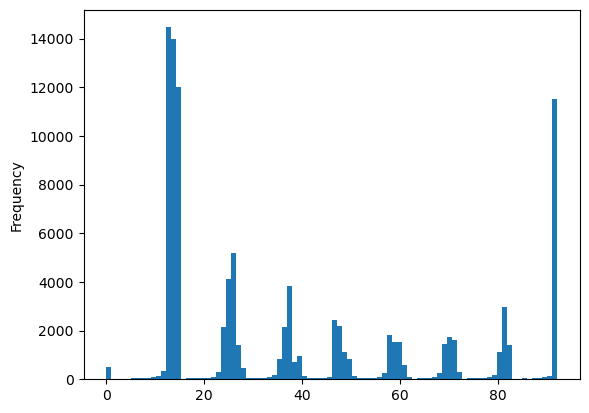

In [55]:
variants_processed.count().plot(kind='hist', bins=90)
plt.savefig('./plot/frequency.png')
plt.show()

In [56]:
# drop the rows with empty and norm
variants_processed = variants_processed.drop(['_dyn_#Empty.Empty', '_dyn_#Norm.Norm'], axis=0)
print(variants_processed.shape)

# drop columns with all NANs
variants_processed = variants_processed.dropna(axis=1, how='all')
variants_processed

(90, 101461)


Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC17,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.110892,0.814550,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62278,0.61363,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [57]:
# replace the remaining NANs with 0
variants_processed = variants_processed.fillna(0)
#set the condition to the first element
conditions = variants_processed.index.map(lambda x: x.split('.')[0])
print(conditions.value_counts())
label_dict = {"_dyn_#Healthy": 0, "_dyn_#Symptomatic-non-COVID-19": 1, "_dyn_#Non-severe-COVID-19": 2, "_dyn_#Severe-COVID-19": 3}

X = variants_processed.values
y = conditions.map(label_dict).values
assert X.shape[0] == y.shape[0]

_dyn_#Non-severe-COVID-19         25
_dyn_#Symptomatic-non-COVID-19    25
_dyn_#Healthy                     22
_dyn_#Severe-COVID-19             18
dtype: int64


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import time

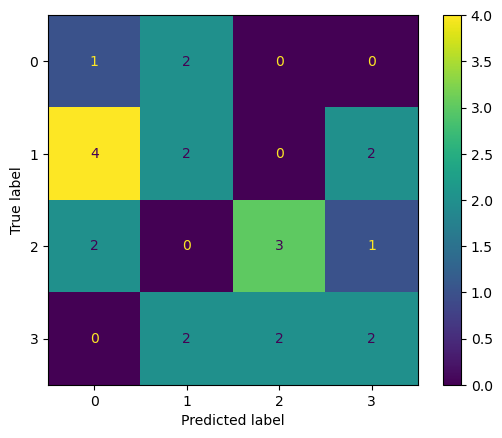

In [59]:
# Set the number of experiments
N = 10
models = []
accuracies = []

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
feature_names = [i for i in range(X_test.shape[1])]

# Fitting Random Forest Classification to the Training set
model = RandomForestClassifier(random_state = 22)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.savefig("./plot/confusion_matrix.jpg")
plt.show()


In [60]:
print(len(y_pred))
accuracies = [y_pred[i] == y_test[i] for i in range(len(y_pred))]
accuracy = accuracies.count(True) / len(accuracies)
print("accuracy = " + str(accuracy))
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

23
accuracy = 0.34782608695652173
Elapsed time to compute the importances: 0.077 seconds


['K.[304.207](Y,116.074)LYETTLE(K,304.207).C', 'R.{291.173}[304.207]ILGGHLDA(K,304.207).G', 'K.[304.207](V,290.171)DNALQSGNSQESVTEQDS(K,304.207).D', '-.[304.207](Y,43.006)EPGEEITYS(C,57.021)(K,304.207)PGYVSR.G', 'R.{290.173}[304.207]EGT(C,57.021)PEAPTDE(C,57.021)(K,304.207)PV(K,304.207).W', 'K.{152.824}[304.207]AAFTE(C,57.021)(C,57.021)QA.-', 'R.[304.207](F,-13.032)(K,304.207)DLGEENF(K,304.207).A', 'S.[236.123]LHTLFGD(K,304.207).L', 'V.[304.207](A,-8.959)TLRETYGEMAD(C,57.021)(C,57.021)A(K,304.207).Q', 'K.[304.207]SLHTLFGD(K,332.213)L(C,57.021)TVA.T']


/tmp/ipykernel_166694/2773206188.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(key_name, fontsize=8.5)


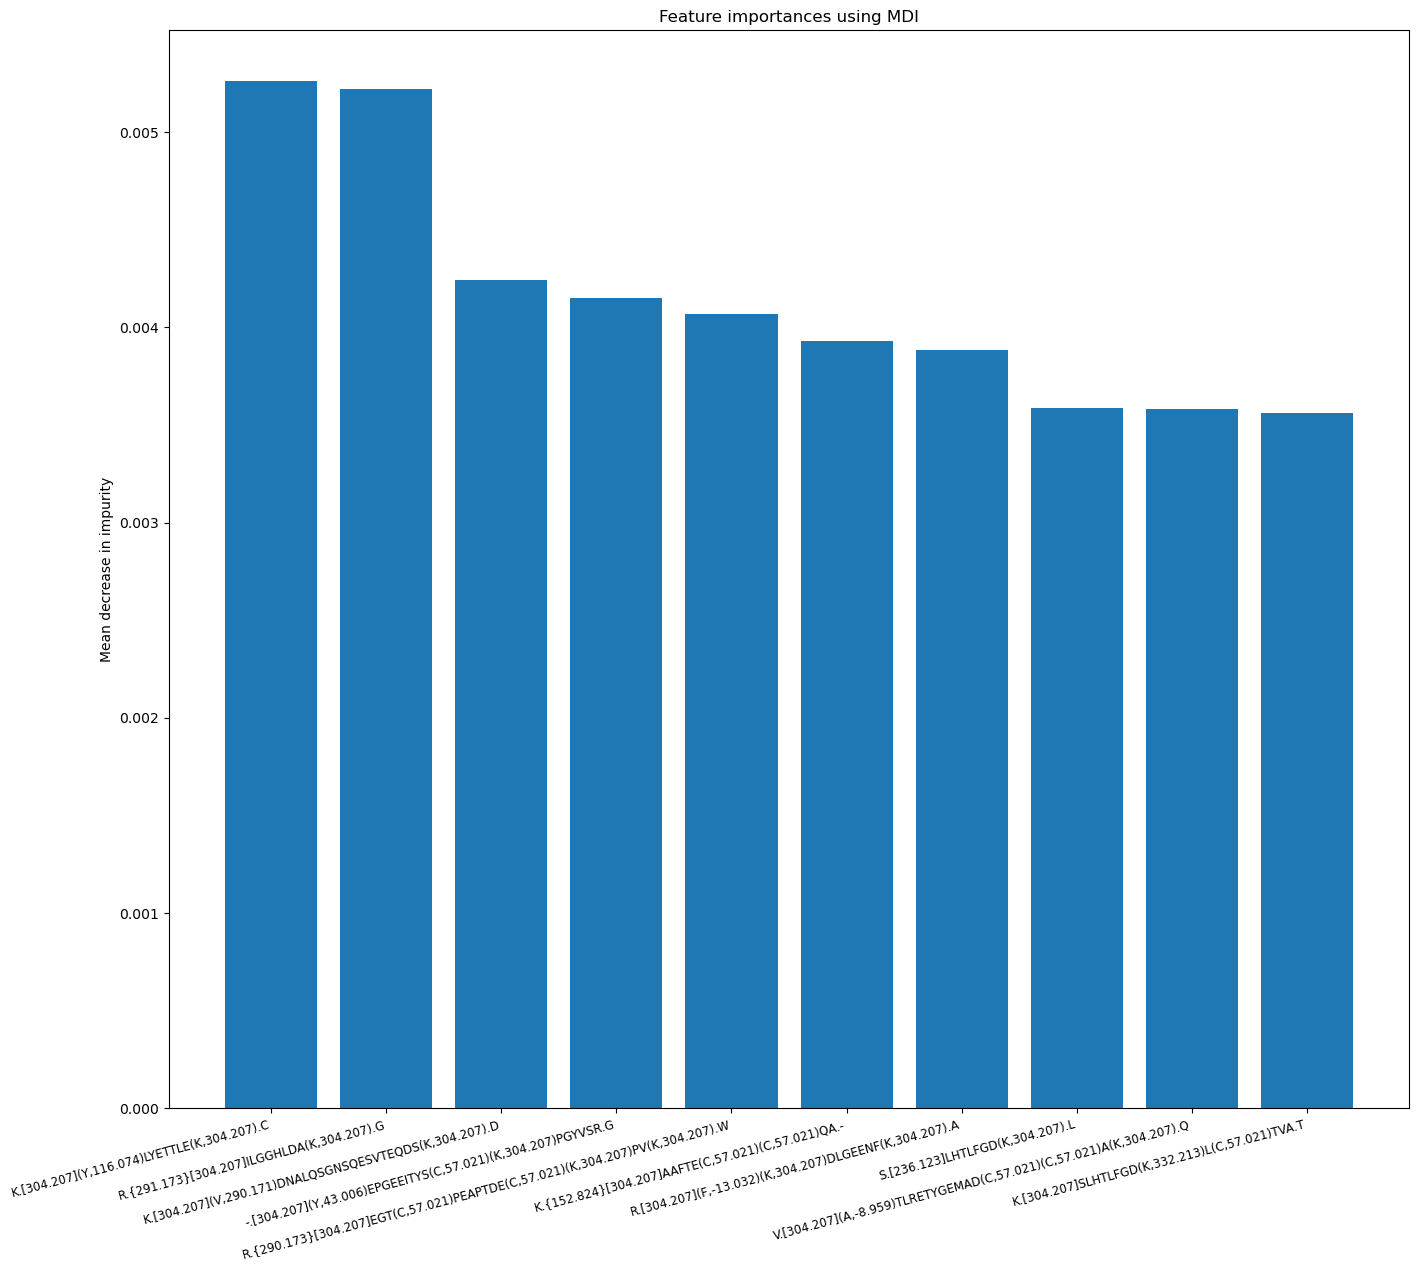

In [61]:
forest_importances = pd.Series(importances, index=feature_names)
# Select the top 10 elements
top_10_elements = forest_importances.nlargest(10)
key_name = [variants_processed.columns.values[i] for i in top_10_elements.keys()]
print(key_name)
fig, ax = plt.subplots()
plt.bar(key_name, top_10_elements.values)
plt.xticks(rotation=15, ha='right')
fig.set_size_inches(16, 14)
ax.set_xticklabels(key_name, fontsize=8.5)
# top_10_elements.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig("./plot/feature_importance.png")
plt.show()

In [62]:
conditions_twoType = [s.replace("_dyn_#", "") for s in conditions]
for i in range(len(conditions_twoType)):
    conditions_twoType[i] = "Non-COVID-19" if conditions_twoType[i] == "Healthy" or conditions_twoType[i] == "Symptomatic-non-COVID-19" else "COVID-19"

variants_processed_twoType = variants_processed
variants_processed_twoType["Condition"] = conditions_twoType
variants_processed_twoType

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Healthy.HC1,0.000000,0.000000,0.935916,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.288821,...,1.958825,0.000000,0.000000,1.174198,0.000000,0.000000,0.000000,0.370040,0.000000,Non-COVID-19
_dyn_#Healthy.HC10,6.645649,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.026024,...,2.544654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Non-COVID-19
_dyn_#Healthy.HC12,3.391896,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.009033,...,0.913199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Non-COVID-19
_dyn_#Healthy.HC13,1.919552,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.028415,...,1.035449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Non-COVID-19
_dyn_#Healthy.HC17,0.000000,0.000000,0.286530,1.259306,0.0,0.0,0.0,0.00000,0.00000,0.000000,...,0.110892,0.814550,0.863862,0.000000,0.000000,0.000000,0.000000,0.791905,0.000000,Non-COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.62278,0.61363,0.020799,...,0.189781,0.000000,0.000000,0.000000,0.000000,0.000000,0.143696,0.000000,0.118712,Non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ7,0.000000,0.435434,0.200232,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.061746,...,0.247039,0.298399,0.000000,0.000000,0.670534,0.304344,0.000000,0.000000,0.000000,Non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ8,0.000000,0.736280,0.170478,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.074855,...,0.246862,0.192796,0.000000,0.000000,1.330314,0.532133,0.000000,0.000000,0.000000,Non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.000000,0.796550,0.197400,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.053722,...,0.296288,0.335600,0.000000,0.000000,1.204776,0.549213,0.000000,0.000000,0.000000,Non-COVID-19


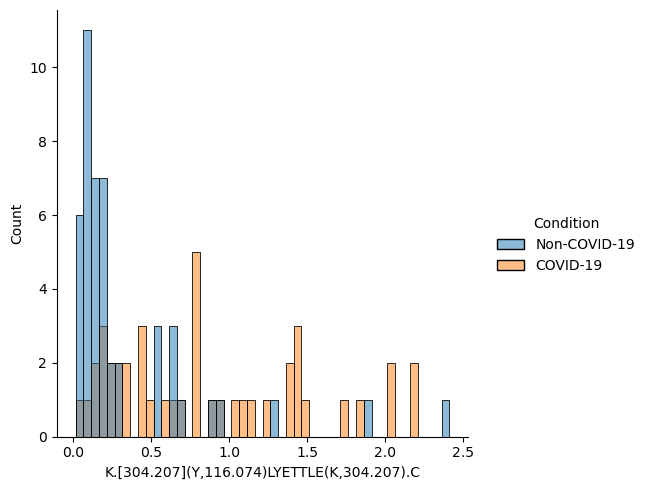

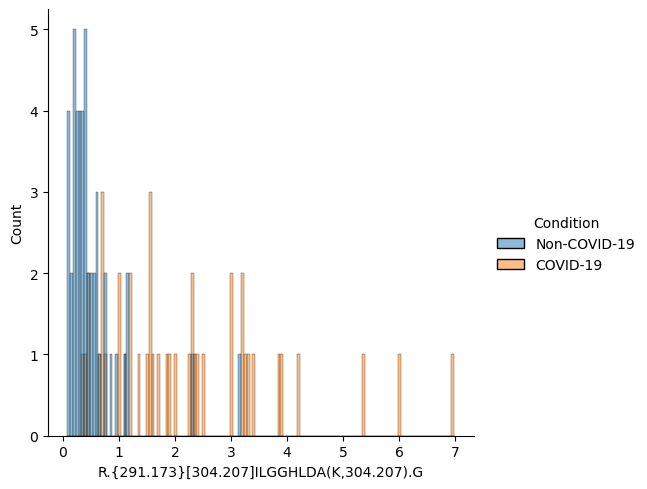

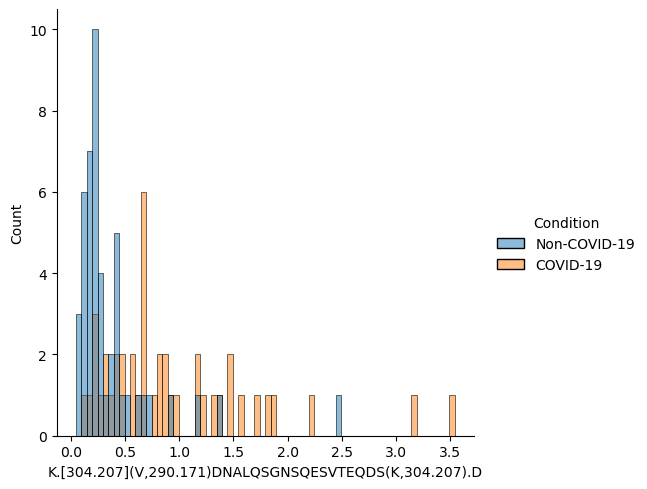

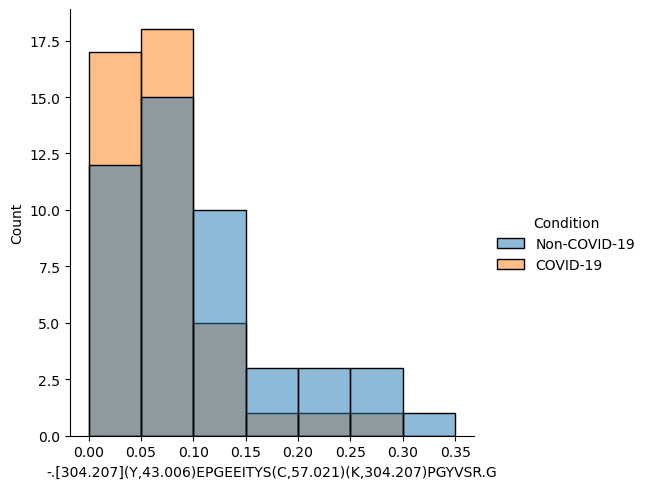

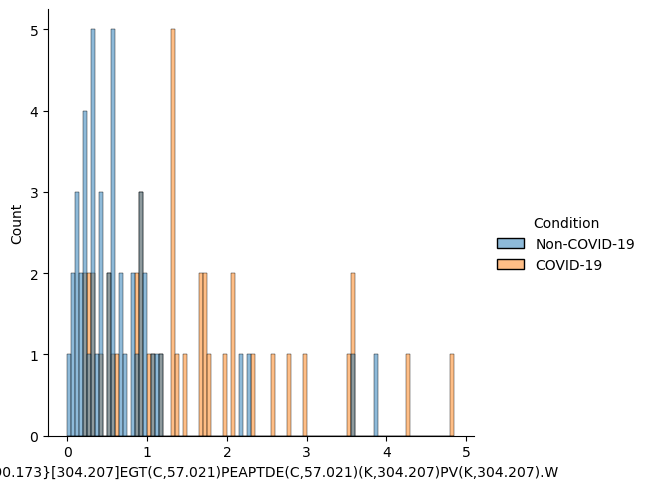

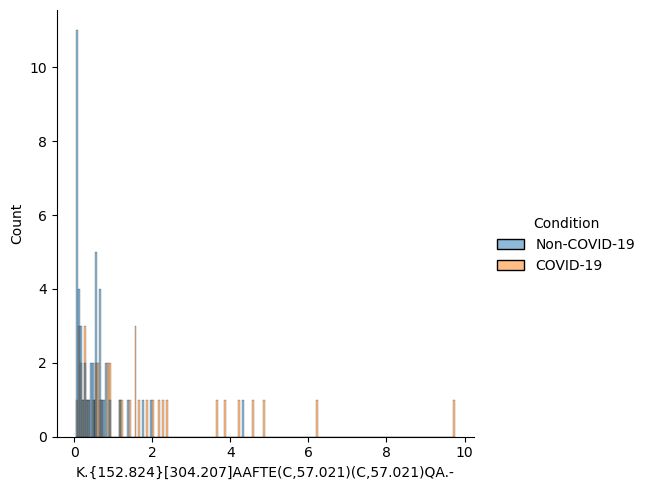

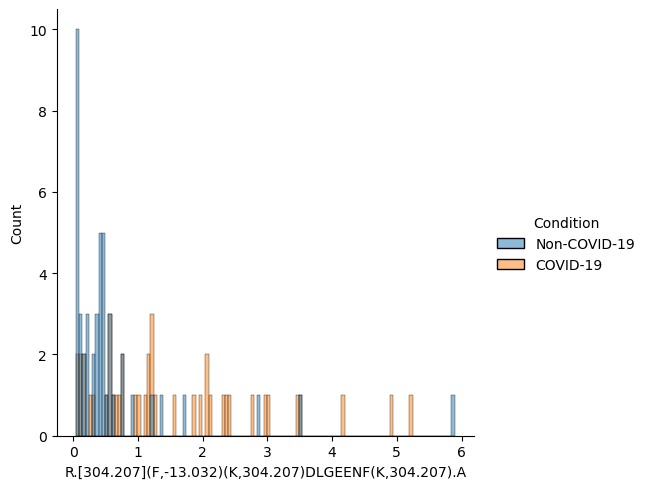

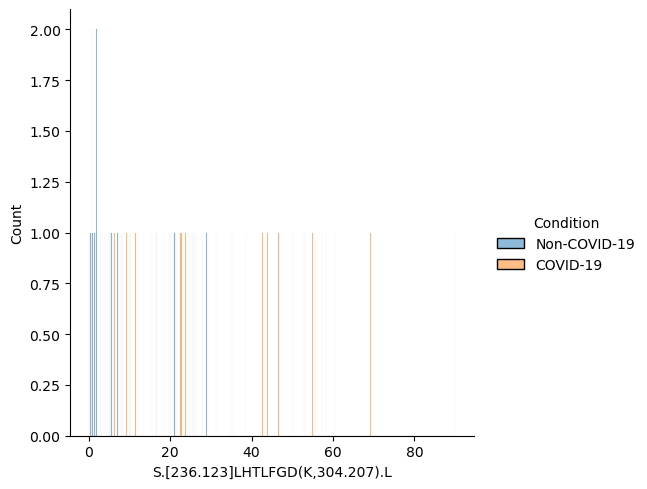

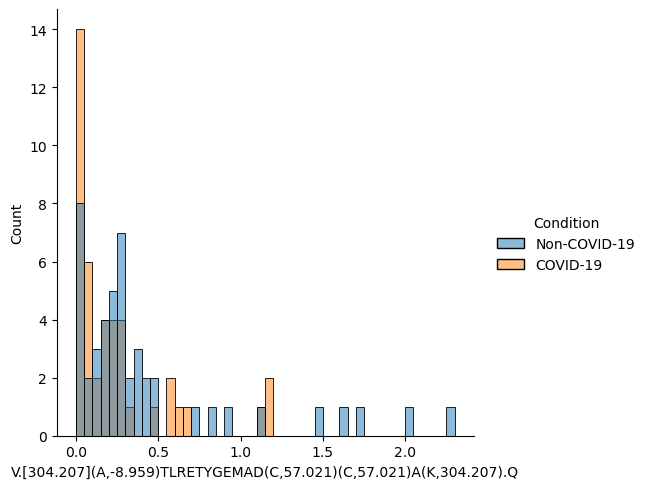

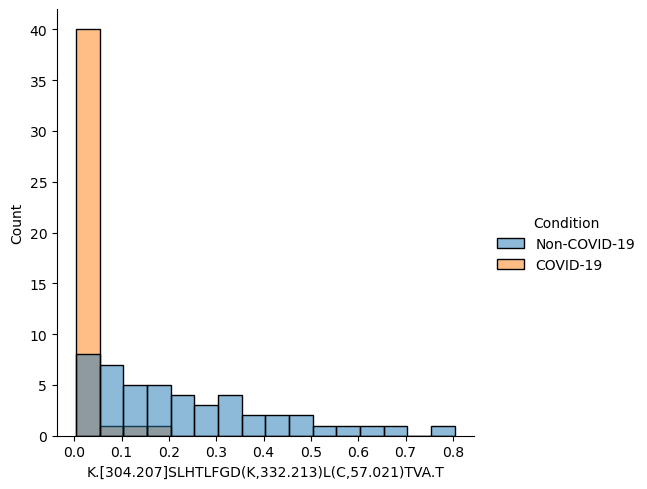

In [63]:
for i in range(10):
    his_data = sns.displot(variants_processed_twoType, x=key_name[i], hue='Condition', binwidth=0.05)
    filename = "./plot/t-test_figure{}.png".format(i)
    his_data.figure.savefig(filename)

In [64]:
from scipy import stats
df = pd.DataFrame(0, index=key_name, columns=['t_statistic', 'p_value'])
for i in range(10):
    peptide = variants_processed_twoType[key_name[i]]
    non_covid = []
    covid = []
    for j in range(peptide.shape[0]):
        if variants_processed_twoType['Condition'][j] == "Non-COVID-19":
            non_covid.append(peptide[j])
        elif variants_processed_twoType['Condition'][j] == "COVID-19":
            covid.append(peptide[j])

    t_statistic, p_value = stats.ttest_ind(covid, non_covid)
    df.loc[key_name[i], 't_statistic'] = t_statistic
    df.loc[key_name[i], 'p_value'] = p_value

df.to_csv('ttest_result.csv')
df

,t_statistic,p_value
"K.[304.207](Y,116.074)LYETTLE(K,304.207).C",4.483795,2.201953e-05
"R.{291.173}[304.207]ILGGHLDA(K,304.207).G",6.971798,5.509120e-10
"K.[304.207](V,290.171)DNALQSGNSQESVTEQDS(K,304.207).D",4.643236,1.191787e-05
"-.[304.207](Y,43.006)EPGEEITYS(C,57.021)(K,304.207)PGYVSR.G",-2.429628,1.714631e-02
"R.{290.173}[304.207]EGT(C,57.021)PEAPTDE(C,57.021)(K,304.207)PV(K,304.207).W",4.033894,1.165641e-04
"K.{152.824}[304.207]AAFTE(C,57.021)(C,57.021)QA.-",3.476922,7.901954e-04
"R.[304.207](F,-13.032)(K,304.207)DLGEENF(K,304.207).A",3.646923,4.489336e-04
"S.[236.123]LHTLFGD(K,304.207).L",5.381317,6.050662e-07
"V.[304.207](A,-8.959)TLRETYGEMAD(C,57.021)(C,57.021)A(K,304.207).Q",-2.030379,4.533714e-02
"K.[304.207]SLHTLFGD(K,332.213)L(C,57.021)TVA.T",-7.295416,1.241951e-10
